# Data Information

__*Advertising data sales (in thousands of units) for a particular product advertising budget(in thousands of dollars) for TV ,Radio and newspaper media.On the basis of this data ,suggest marketing plan for the next year that will result in high product sales.*__

# Data Importing

In [ ]:
#Importing data using pandas library
#Understanding the structure of tha data

In [1]:
import pandas as pd                #Data manipulation
import numpy as np                 #linear algebra
import seaborn as sns              #Data visualization
import matplotlib.pyplot as plt    #Data visualization
import warnings                          # Hiding Warnings
warnings.filterwarnings('ignore')

In [2]:
#reading data
adv=pd.read_csv("C:\\Users\\Admin\\Advertising.csv")
adv.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# Exploratory Data Analysis

In [3]:
adv.size

1000

In [4]:
adv.shape

(200, 5)

In [5]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
adv.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000



# Data Preprocessing

Steps involved in Data Preprocessing :

__*Data cleaning*__

__*Identifying and removing outliers*__

__*Encoding categorical variables*__

In [7]:
#Missing Value Cheaking
adv.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [8]:
#Duplicate value checking
adv.duplicated().sum()

0

In [9]:
adv.nunique()

Unnamed: 0    200
TV            190
Radio         167
Newspaper     172
Sales         121
dtype: int64

In [10]:
adv=adv.drop(columns="Unnamed: 0")

In [11]:
adv.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

<AxesSubplot:>

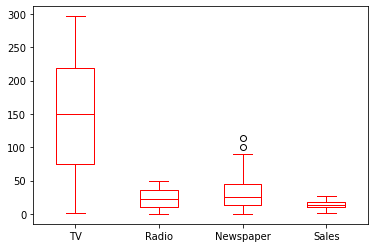

In [12]:
#Outlier Detection
adv.boxplot(grid=False,color="red")

In [13]:
adv=adv[adv.Newspaper<100]

<AxesSubplot:>

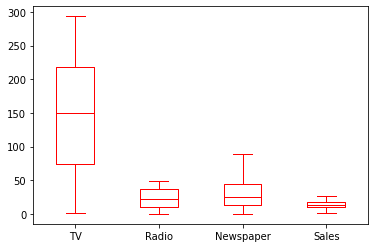

In [14]:
adv.boxplot(grid=False,color="red")

__*Now there no any outlier present in the dataset*__

# Visualising Data

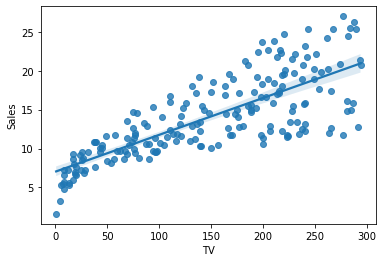

In [15]:
sns.regplot(x='TV', y="Sales", data=adv) 
plt.show() 

__*There is positive correlation between TV and Sales*__

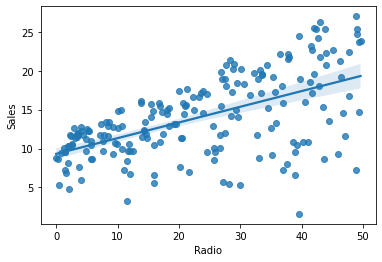

In [16]:
sns.regplot(x="Radio", y="Sales", data=adv) 
plt.show()

__*There is positive correlation between Radio and Sales*__

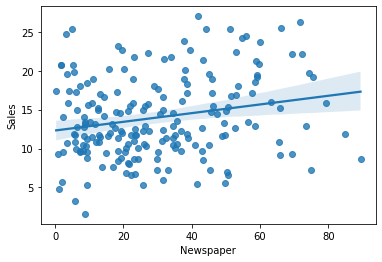

In [17]:
sns.regplot(x="Newspaper", y="Sales", data=adv) 
plt.show()

__*It seems like a positive correlation between Sales and Newspaper*__

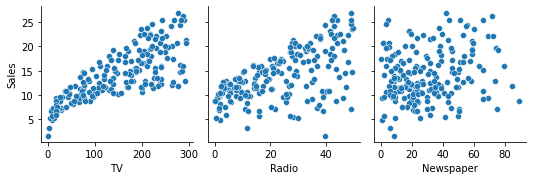

In [18]:
sns.pairplot(data=adv, 
             x_vars=["TV","Radio","Newspaper"],
             y_vars="Sales") 

In [19]:
#Checking Multicollinearity
adv.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.051978,0.049771,0.779121
Radio,0.051978,1.000000,0.346364,0.576748
Newspaper,0.049771,0.346364,1.000000,0.219555
Sales,0.779121,0.576748,0.219555,1.000000


<AxesSubplot:>

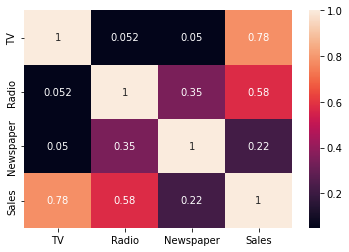

In [20]:
sns.heatmap(adv.corr(), annot=True) 

__*There is no any kind of multicollinearity between independent variables*__

# Performing Linear Regression 

In [ ]:
#Splitting data into Dependent and indepedent variable 

In [21]:
x = adv.drop(columns=["Sales"],axis=1)
y = adv.Sales

In [22]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [23]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [ ]:
#Splitting Data into train test

__*Now I split variable into training and testing sets. I will perform this by importing train_test_split from the sklearn.model_selection library. It is usually a good practice to keep 70% of data in train dataset and the rest 30% in test dataset*.__

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=55)

In [26]:
X_train.shape, y_train.shape

((138, 3), (138,))

In [27]:
 X_test.shape,y_test.shape

((60, 3), (60,))

In [28]:
# Let's take a look at train dataset 
X_train.head()

,TV,Radio,Newspaper
192,17.2,4.1,31.6
64,131.1,42.8,28.9
12,23.8,35.1,65.9
93,250.9,36.5,72.3
47,239.9,41.5,18.5


In [29]:
y_train.head()

192     5.9
64     18.0
12      9.2
93     22.2
47     23.2
Name: Sales, dtype: float64

# Creating Linear Regression Model

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from math import sqrt
import numpy as np
from sklearn import metrics

In [31]:
model = LinearRegression()

In [32]:
model.fit(X_train,y_train)

LinearRegression()

In [33]:
model.intercept_

3.1395405879243707

In [34]:
model.coef_

array([ 0.04649832,  0.18653561, -0.00782244])

In [35]:
#calculation sales price manually with tv,radio, newspaper=50
0.04649832*50+0.18653561 *50 -0.00782244*50 + 3.1395405879243707

14.400115087924371

In [36]:
x_new=pd.DataFrame({'TV':[50],
                   'Newspaper':[50],
                   'Radio':[50]})
x_new.head()

,TV,Newspaper,Radio
0,50,50,50


In [37]:
new_pred=model.predict(x_new)
new_pred

array([14.40011485])

__*We get the same prediction equivalent to manual calculation.*__

# Model Prediction

In [38]:
y_pred=model.predict(X_test)

In [39]:
y_pred

array([11.49807225, 15.24800552, 20.79000889, 15.67548208, 10.3626472 ,
       12.5974675 , 15.59744079, 16.70260982, 19.0019607 , 20.60249678,
       23.97183605, 14.09237987,  9.19271266,  7.48433652, 18.49503234,
        5.44940886,  7.66728064, 21.89864572, 14.08609219, 17.23979687,
       14.94496483, 20.7092529 , 23.24164165, 11.69193229, 10.0691126 ,
        9.80988043, 12.07931081, 19.91269425, 19.58430257,  4.5547767 ,
       12.56734273, 12.42496748,  8.07566532, 11.54245087, 13.05445994,
       10.81663468, 23.64311285, 17.35490607, 21.19651826, 12.7480678 ,
       20.5721518 , 10.84124308,  6.72546823, 17.88497794, 17.56829377,
       18.15824833, 15.4822332 , 17.1069455 ,  9.08773582,  5.83287143,
       12.7490608 , 19.22192307,  9.86949176,  3.92332844, 23.17448447,
       11.53203759,  8.79742537, 15.04133595, 19.25602115, 12.23318167])

In [40]:
r2=r2_score(y_test,y_pred)
r2

0.9038609442070772

__*r2 measure the proportion of variation explianed by the regressor X*__

_Here the value of r2 is __0.9038609442070772__ which is closed to 1 which implies that most of the variability in y explained by the regression model._

In [41]:
print("MSE : ",(mean_squared_error(y_test,y_pred)))
print("MAE : ",mean_absolute_error(y_test, y_pred))
print("RMSE : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE :  2.8159246945037504
MAE :  1.296544747926927
RMSE :  1.678071719118033


In [42]:
df=pd.DataFrame(y_pred,y_test)
df.head()

,0
Sales,
11.8,11.498072
15.9,15.248006
20.8,20.790009
12.7,15.675482
6.6,10.362647


# __*Thank You.*__